In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

### Simple Threshodling

In [2]:
image = cv2.imread("../../images/coins.png")

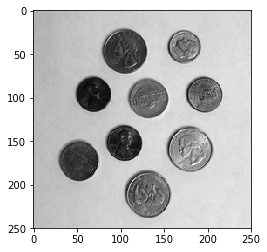

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')


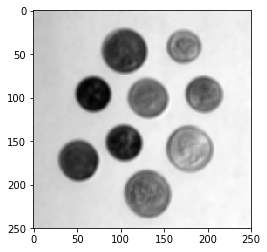

In [39]:
blurred = cv2.GaussianBlur(image, (5, 5), 5)
plt.imshow(blurred,cmap='gray')

we apply Gaussian blurring with a σ = 5 radius. Applying Gaussian blurring helps remove some of the high frequency edges in the image that we are not concerned with

(-10, 256)

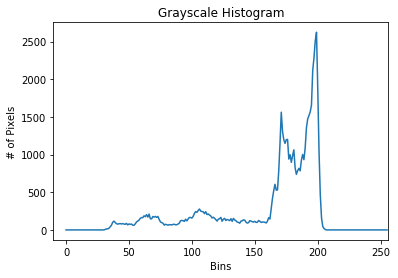

In [49]:
hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([-10, 256])


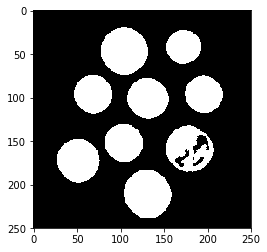

In [40]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv,cmap='gray')

155.0


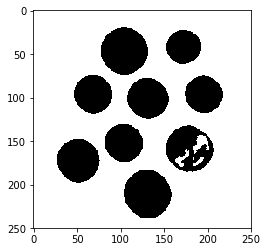

In [41]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
print(T)
plt.imshow(thresh,cmap='gray')

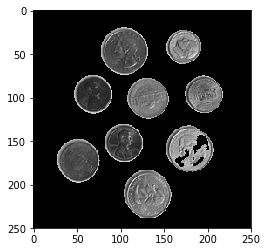

In [31]:
plt.imshow(cv2.bitwise_and(image, image, mask = threshInv),cmap='gray')

### Adaptive Threshodling

if the image exhibits a lot of range in pixel intensities <br>
just one value of T might not suffice
we can use adap- tive thresholding, which considers small neighbors of pixels and then finds an optimal threshold value T for each neigh- bor. This method allows us to handle cases where there may be dramatic ranges of pixel intensities and the optimal value of T may change for different parts of the image.


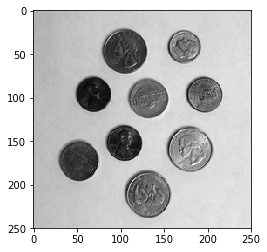

In [42]:
plt.imshow(image,cmap='gray')

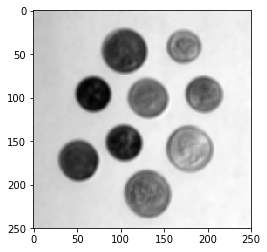

In [45]:
blurred = cv2.GaussianBlur(image, (5, 5), 5)
plt.imshow(blurred,cmap='gray')

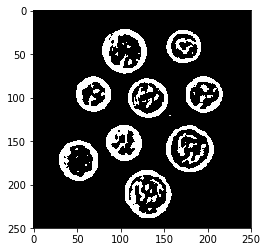

In [46]:
thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.imshow(thresh,cmap='gray')

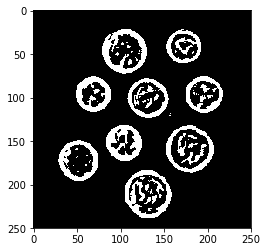

In [48]:
thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.imshow(thresh,cmap='gray')

### Otsu and Riddler

Another way we can automatically compute the threshold
value of T is to use Otsu’s method.Otsu’s method assumes there are two peaks in the grayscale histogram of the image. It then tries to find an optimal value to separate these two peaks – thus our value of T.

In [9]:
#!pip install mahotas

In [8]:
import mahotas

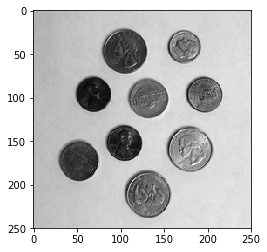

In [10]:
plt.imshow(image,cmap='gray')

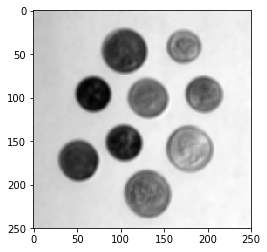

In [11]:
blurred = cv2.GaussianBlur(image, (5, 5), 5)
plt.imshow(blurred,cmap='gray')

Otsu

In [12]:
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

Otsu's threshold: 137


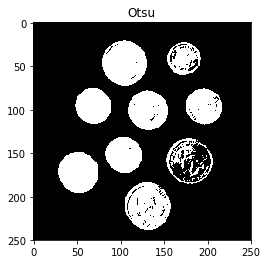

In [15]:
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.title('Otsu')
plt.imshow(thresh,cmap='gray')

Riddler-Calvard

In [16]:
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))

Riddler-Calvard: 137.45525886496935


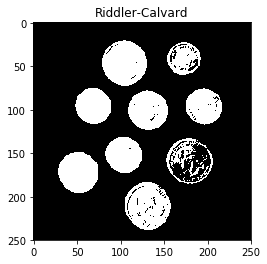

In [17]:
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.title('Riddler-Calvard')
plt.imshow(thresh,cmap='gray')